<a href="https://colab.research.google.com/github/suwisitlk/229351-StatisticalLearning/blob/main/229351_LAB11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [43]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-21 12:58:22--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.02s   

2025-09-21 12:58:23 (5.86 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [44]:
!pip install numpy==1.26.4
!pip install pmdarima

In [45]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


In [46]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'], index_col='Date')

data.head()

,MaxTemp
Date,
1998-01-01,30.6
1998-01-02,32.0
1998-01-03,31.6
1998-01-04,32.1
1998-01-05,31.2


# 1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน

ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [47]:
y = data['MaxTemp'].resample("M").mean()

/tmp/ipython-input-3759875875.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = data['MaxTemp'].resample("M").mean()


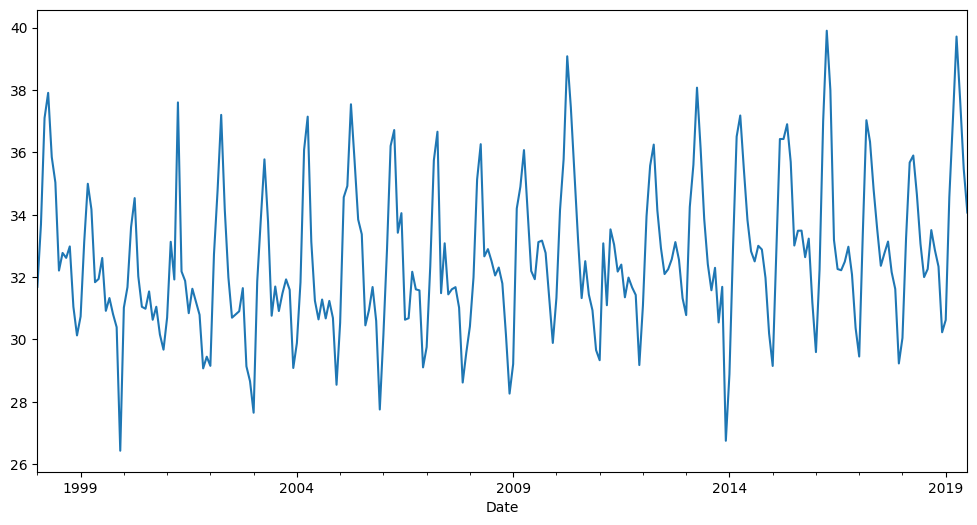

In [48]:
plt.figure(figsize=(12,6))
y.plot();

# 2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ

In [49]:
train = y[:-24]
test = y[-24:]

print('train : \n', train)
print('test : \n',test)

train : 
 Date
1998-01-31    31.687097
1998-02-28    33.685714
1998-03-31    37.103226
1998-04-30    37.910000
1998-05-31    35.848387
                ...    
2017-03-31    37.032258
2017-04-30    36.340000
2017-05-31    34.806452
2017-06-30    33.523333
2017-07-31    32.361290
Freq: ME, Name: MaxTemp, Length: 235, dtype: float64
test : 
 Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


# ตรวจสอบว่าข้อมูลสำหรับ train มีความเป็น Stationary ไหม

In [50]:
from statsmodels.tsa.stattools import adfuller, kpss

def KPSStest(timeseries):
  kpsstest = kpss(timeseries)
  print('KPSS test')
  print('Test Statistic: ',kpsstest[0])
  print('p-value: ',kpsstest[1])
  print('Number of Observations Used: ',kpsstest[2])
  print('Critical Values: ',kpsstest[3])

def ADFtest(timeseries):
  adftest = adfuller(timeseries)
  print('ADF test')
  print('Test Statistic: ',adftest[0])
  print('p-value: ',adftest[1])
  print('#Lags Used: ',adftest[2])
  print('Number of Observations Used: ',adftest[3])
  print('Critical Values: ',adftest[4])

In [51]:
KPSStest(train)
ADFtest(train)

KPSS test
Test Statistic:  0.47930278234795065
p-value:  0.046328202173884996
Number of Observations Used:  4
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -2.5832544946506935
p-value:  0.09650784820836478
#Lags Used:  13
Number of Observations Used:  221
Critical Values:  {'1%': -3.4602906385073884, '5%': -2.874708679520702, '10%': -2.573788599127782}


Test stationarity


KPSS
H0 : data is stationary
H1 : data is not stationary


ADF
H0 : data is not stationary
H1 : data is stationary



KPSStest(y_diff) ค่ามากกว่าค่าวิกฤต ยอมรับ H0


ADFtest(y_diff) ค่าน้อยกว่าค่าวิกฤต ยอมรับ H1

พบว่า
* KPSS test p-value : 0.0463 ยอมรับ H1 = Not stationary

* ADF test p-value : 0.9650 ยอมรับ H0 = Not stationary




# ทำการ differencing เพื่อให้ข้อมูลเป็น stationary (d=1)

In [52]:
train_diff = train-train.shift()
train_diff.dropna(inplace=True)

KPSStest(train_diff)
ADFtest(train_diff)

KPSS test
Test Statistic:  0.04629674763908976
p-value:  0.1
Number of Observations Used:  27
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -6.199851469409117
p-value:  5.843136734970066e-08
#Lags Used:  12
Number of Observations Used:  221
Critical Values:  {'1%': -3.4602906385073884, '5%': -2.874708679520702, '10%': -2.573788599127782}


/tmp/ipython-input-3817557194.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries)


พบว่า
* KPSS test p-value : 0.1 ยอมรับ H0 = is stationar

* ADF test p-value : 5.84e-08 ยอมรับ H1 = is stationary


# พล็อต ACF/PACF แบบยาว (lags=48) เพื่อตรวจสอบว่า ฤดูกาล (seasonality) ว่า stationary หรือยัง

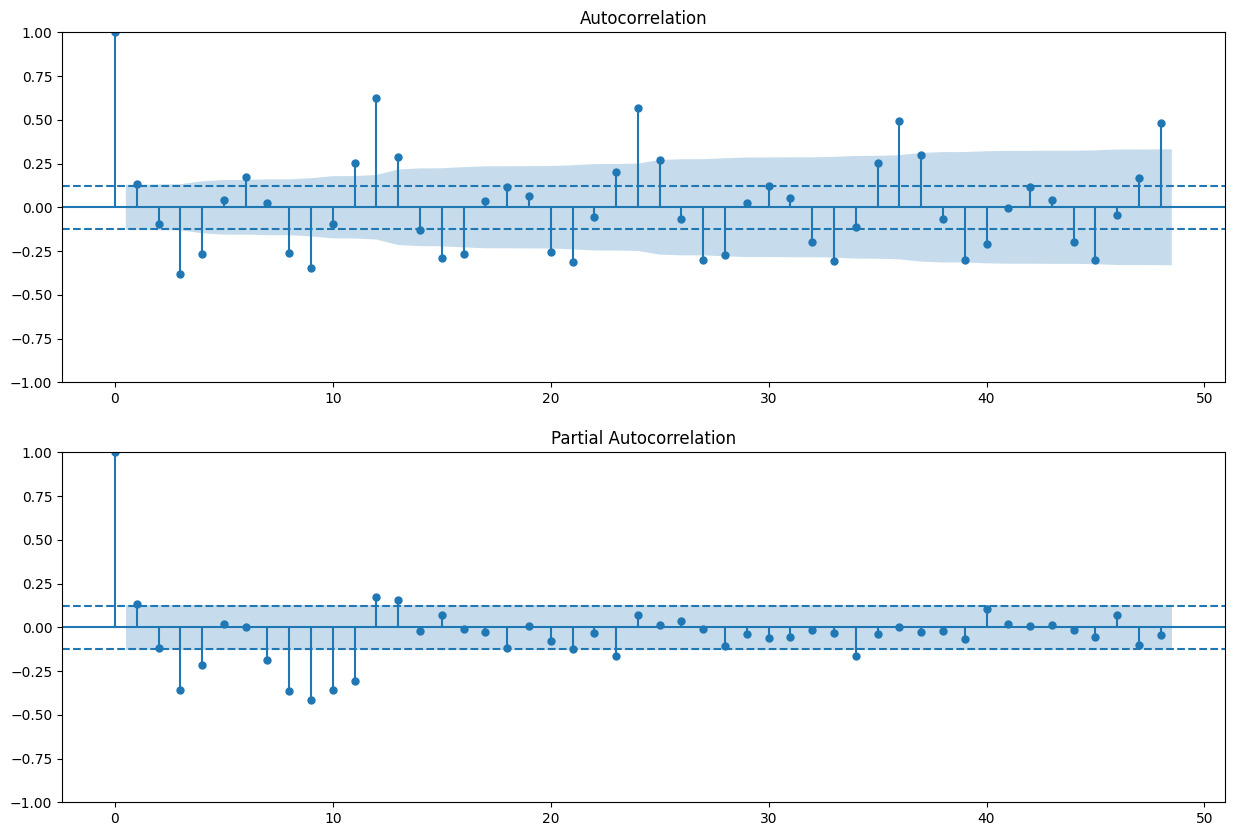

In [53]:
fig, ax = plt.subplots(2,1,figsize=(15, 10))

plot_acf(train_diff, lags=48, ax=ax[0]);
ax[0].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[0].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

plot_pacf(train_diff, lags=48, ax=ax[1]);
ax[1].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[1].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

พบว่า มีแพตเทิร์นชัดเจนของ seasonary ดังนั้นจึงต้อง season_diff

In [54]:
train_season_diff = train_diff.diff(12).dropna()

# พล็อต ACF/PACF แบบยาว (lags=48) รอบ 2 หลัง  seasonal differencing

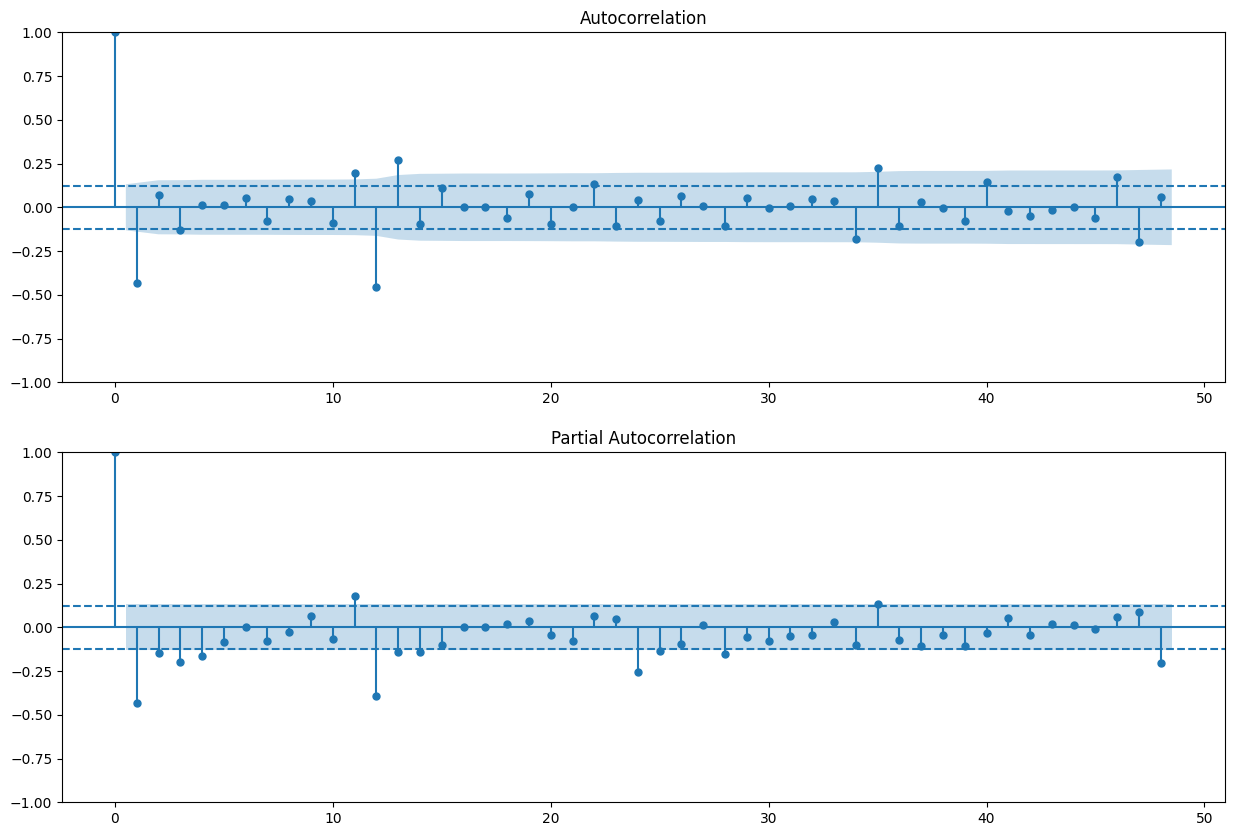

In [55]:
fig, ax = plt.subplots(2,1,figsize=(15, 10))

plot_acf(train_season_diff, lags=48, ax=ax[0]);
ax[0].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[0].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

plot_pacf(train_season_diff, lags=48, ax=ax[1]);
ax[1].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[1].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

พบว่าข้อมูล season is stationary ซึ่งสามารถหา P, Q ได้ดังนี้
*   ACF : Q = 1, P = 0
*   PACF : P = 1, Q = 0
*   D = 1


# พล็อต ACF/PACF แบบสั้น (lags=20) → หา p, q

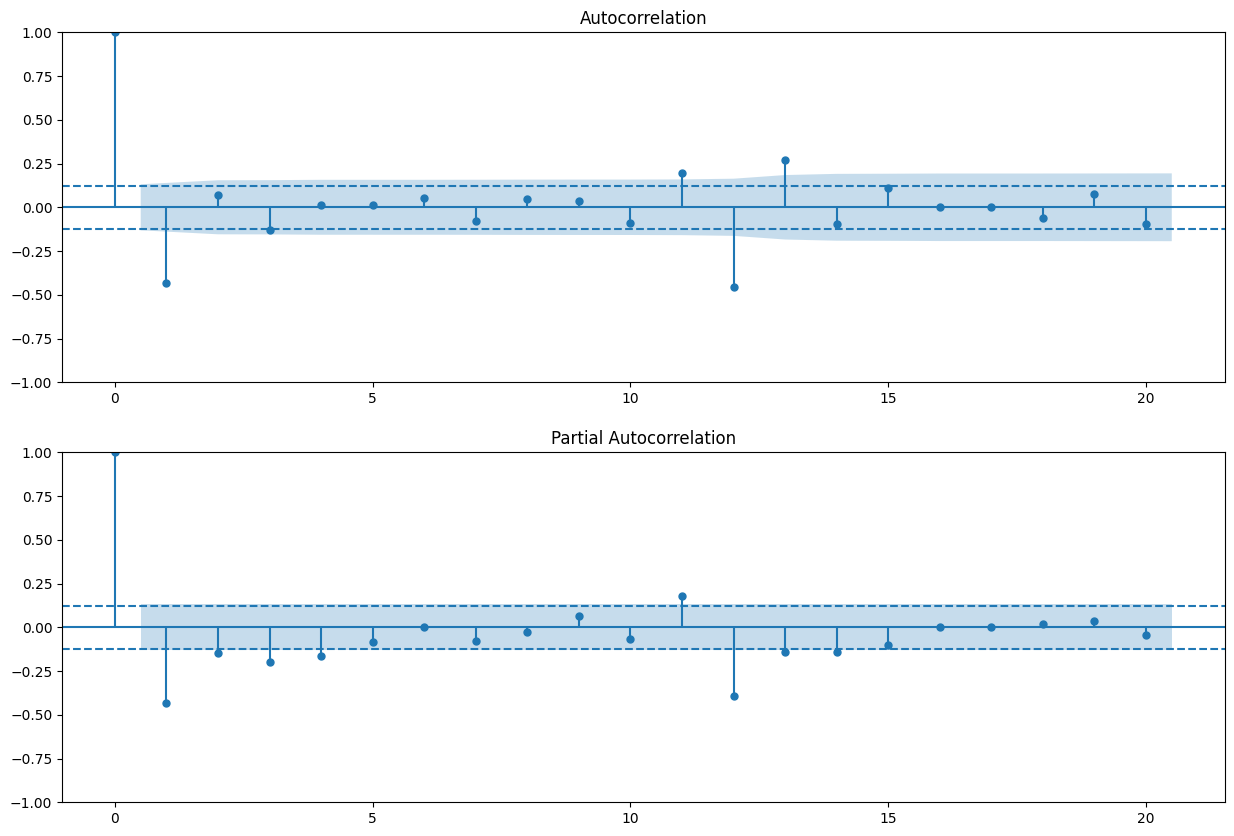

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1,figsize=(15, 10))

plot_acf(train_season_diff, lags=20, ax=ax[0]);
ax[0].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[0].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

plot_pacf(train_season_diff, lags=20, ax=ax[1]);
ax[1].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[1].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

พบว่า (p, d=1, q)
*   ACF : q = 1, p = 0
*   PACF : p = 1, q = 0

# 3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด

## สรุป Candidates 4 ตัว ที่จะทดสอบ SARIMA
### [ order = (p, d=1, q), seasonal_order=(P, D=1, Q, s=12)]
*  order=(1, 1, 0), seasonal_order=(1, 1, 0, 12)
*  order=(1, 1, 0), seasonal_order=(0, 1, 1, 12)
*  order=(0, 1, 1), seasonal_order=(1, 1, 0, 12)
*  order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)


## #1 order=(1, 1, 0), seasonal_order=(1, 1, 0, 12)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


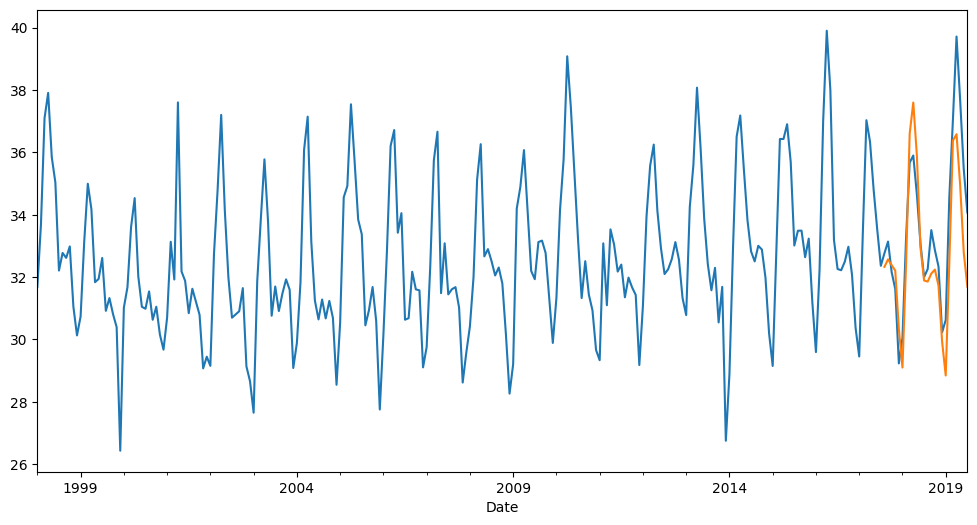

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))

sarima_fit_1 = sarima.fit(optimized=True)
yhat_1 = sarima_fit_1.predict('2017-08-31', '2019-07-31')

plt.figure(figsize=(12,6))
y.plot()
yhat_1.plot();

## #2 order=(1, 1, 0), seasonal_order=(0, 1, 1, 12)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


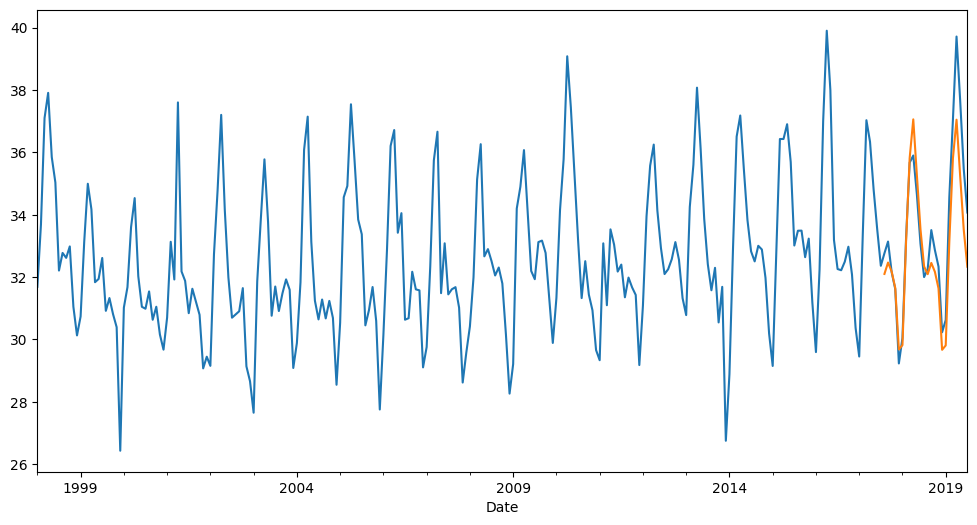

In [67]:
sarima = SARIMAX(train, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))

sarima_fit_2 = sarima.fit(optimized=True)
yhat_2 = sarima_fit_2.predict('2017-08-31', '2019-07-31')

plt.figure(figsize=(12,6))
y.plot()
yhat_2.plot();

## #3 order=(0, 1, 1), seasonal_order=(1, 1, 0, 12)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


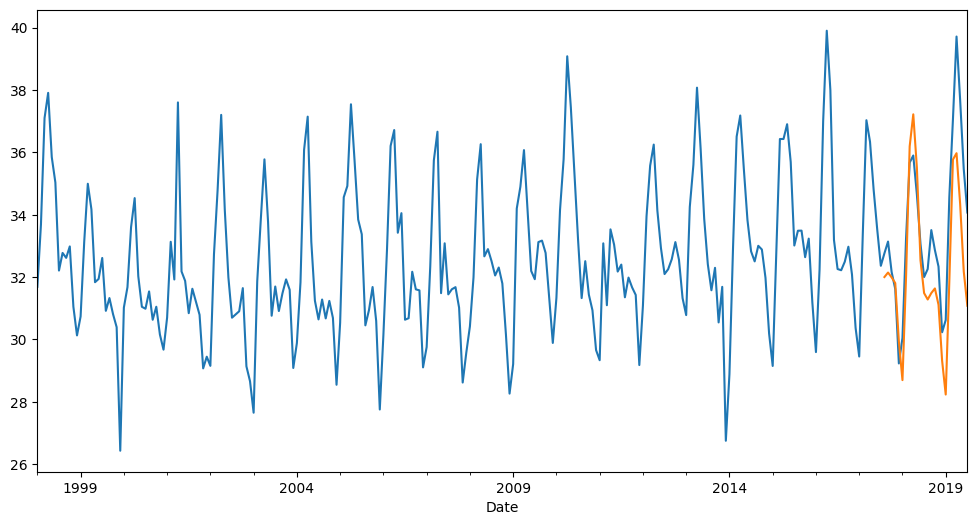

In [68]:
sarima = SARIMAX(train, order=(0, 1, 1), seasonal_order=(1, 1, 0, 12))

sarima_fit_3 = sarima.fit(optimized=True)
yhat_3 = sarima_fit_3.predict('2017-08-31', '2019-07-31')

plt.figure(figsize=(12,6))
y.plot()
yhat_3.plot();

## #4 order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


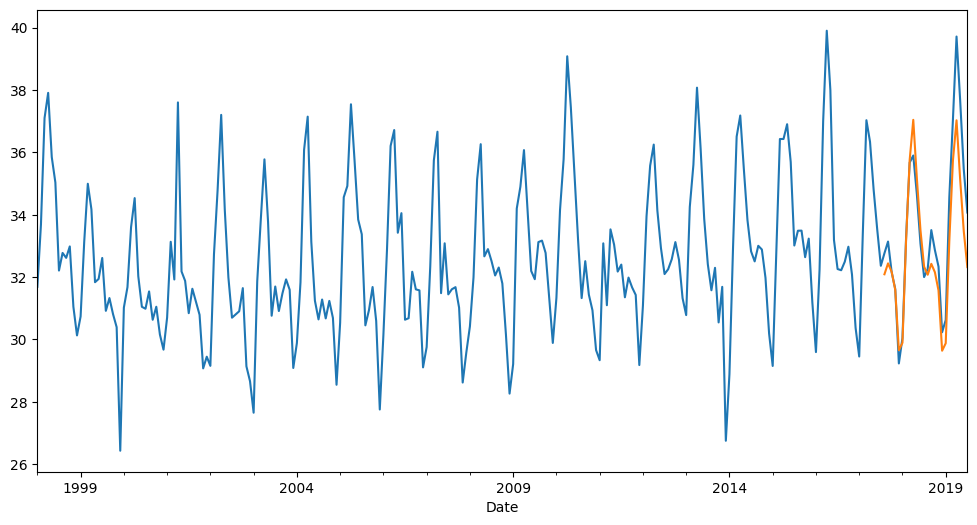

In [74]:
sarima = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))

sarima_fit_4 = sarima.fit(optimized=True)
yhat_4 = sarima_fit_4.predict('2017-08-31', '2019-07-31')

plt.figure(figsize=(12,6))
y.plot()
yhat_4.plot();

ตรวจสอบ AIC

In [70]:
s1 = sarima_fit_1.aic
s2 = sarima_fit_2.aic
s3 = sarima_fit_3.aic
s4 = sarima_fit_4.aic

aic = pd.Series(
    [s1, s2, s3, s4],
    index=['s1','s2','s3','s4'])

aic.sort_values()

,0
s4,699.941748
s2,726.498041
s3,748.414922
s1,768.770457


สรุป โมเดลที่ AIC ต่ำสุด → โมเดล #4 order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)2)

## ตรวจสอบ RMSE

In [71]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [72]:
print('r1 :',rmse(test,yhat_1))
print('r2 :',rmse(test,yhat_2))
print('r3 :',rmse(test,yhat_3))
print('r4 :',rmse(test,yhat_4))

r1 : 1.4439307295633401
r2 : 1.1130540722975069
r3 : 1.793220624818516
r4 : 1.1286900771041068


สรุป โมเดลที่ได้ค่า RMSE ต่ำที่สุดคือ : โมเดล #2

# **ดังนั้นผู้จัดทำเห็นว่าโมเดลที่ดีที่สุดในการทำนายควรเป็น โมเดล #2**
## เนื่องจาก มี **ค่า RMSE ต่ำที่สุด** หมายความว่าค่าที่ทำนายมีค่าใกล้เคียงกับค่าจริงมากที่สุด นอกจากนี้มีค่า **AIC ที่ต่ำที่สุดเป็นอันดับสอง** หมายความว่าโมเดลมีความสมดุลระหว่างความซับซ้อนและความสามารถในการอธิบายข้อมูลได้ดี

#4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


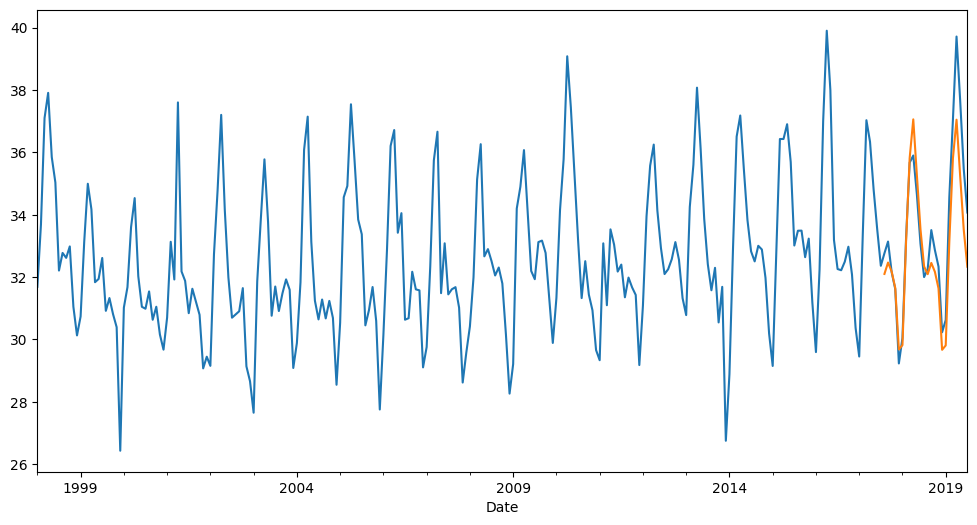

In [73]:
sarima = SARIMAX(train, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))

sarima_fit_2 = sarima.fit(optimized=True)
yhat_2 = sarima_fit_2.predict('2017-08-31', '2019-07-31')

plt.figure(figsize=(12,6))
y.plot()
yhat_2.plot();